# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


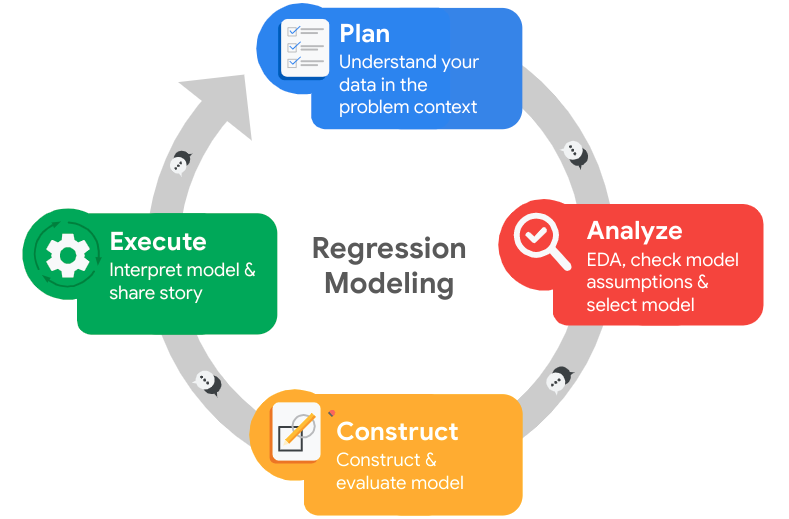

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [205]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import PredefinedSplit

### YOUR CODE HERE ### 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
df0.isin([np.inf, -np.inf]).sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0=df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                    'Work_accident':'work_accident','Department':'department'})


# Display all column names after the update
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()== True].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df = df0.drop_duplicates(keep = 'first')
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

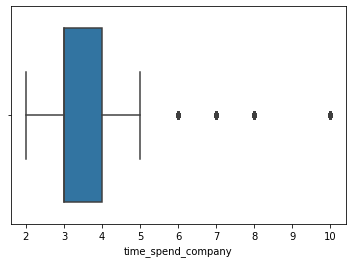

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data = df, x='time_spend_company')


In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

IQR = np.quantile(df['time_spend_company'], .75, axis=0)-np.quantile(df['time_spend_company'], .25, axis=0)
IQR

1.0

In [16]:
upper_lim=np.quantile(df['time_spend_company'], .75, axis=0)+(IQR*1.5)
lower_lim=np.quantile(df['time_spend_company'], .25, axis=0)-(IQR*1.5)
print(upper_lim)
print(lower_lim)

5.5
1.5


In [17]:
df[(df['time_spend_company']> upper_lim) | (df['time_spend_company']< lower_lim)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [28]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize = True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

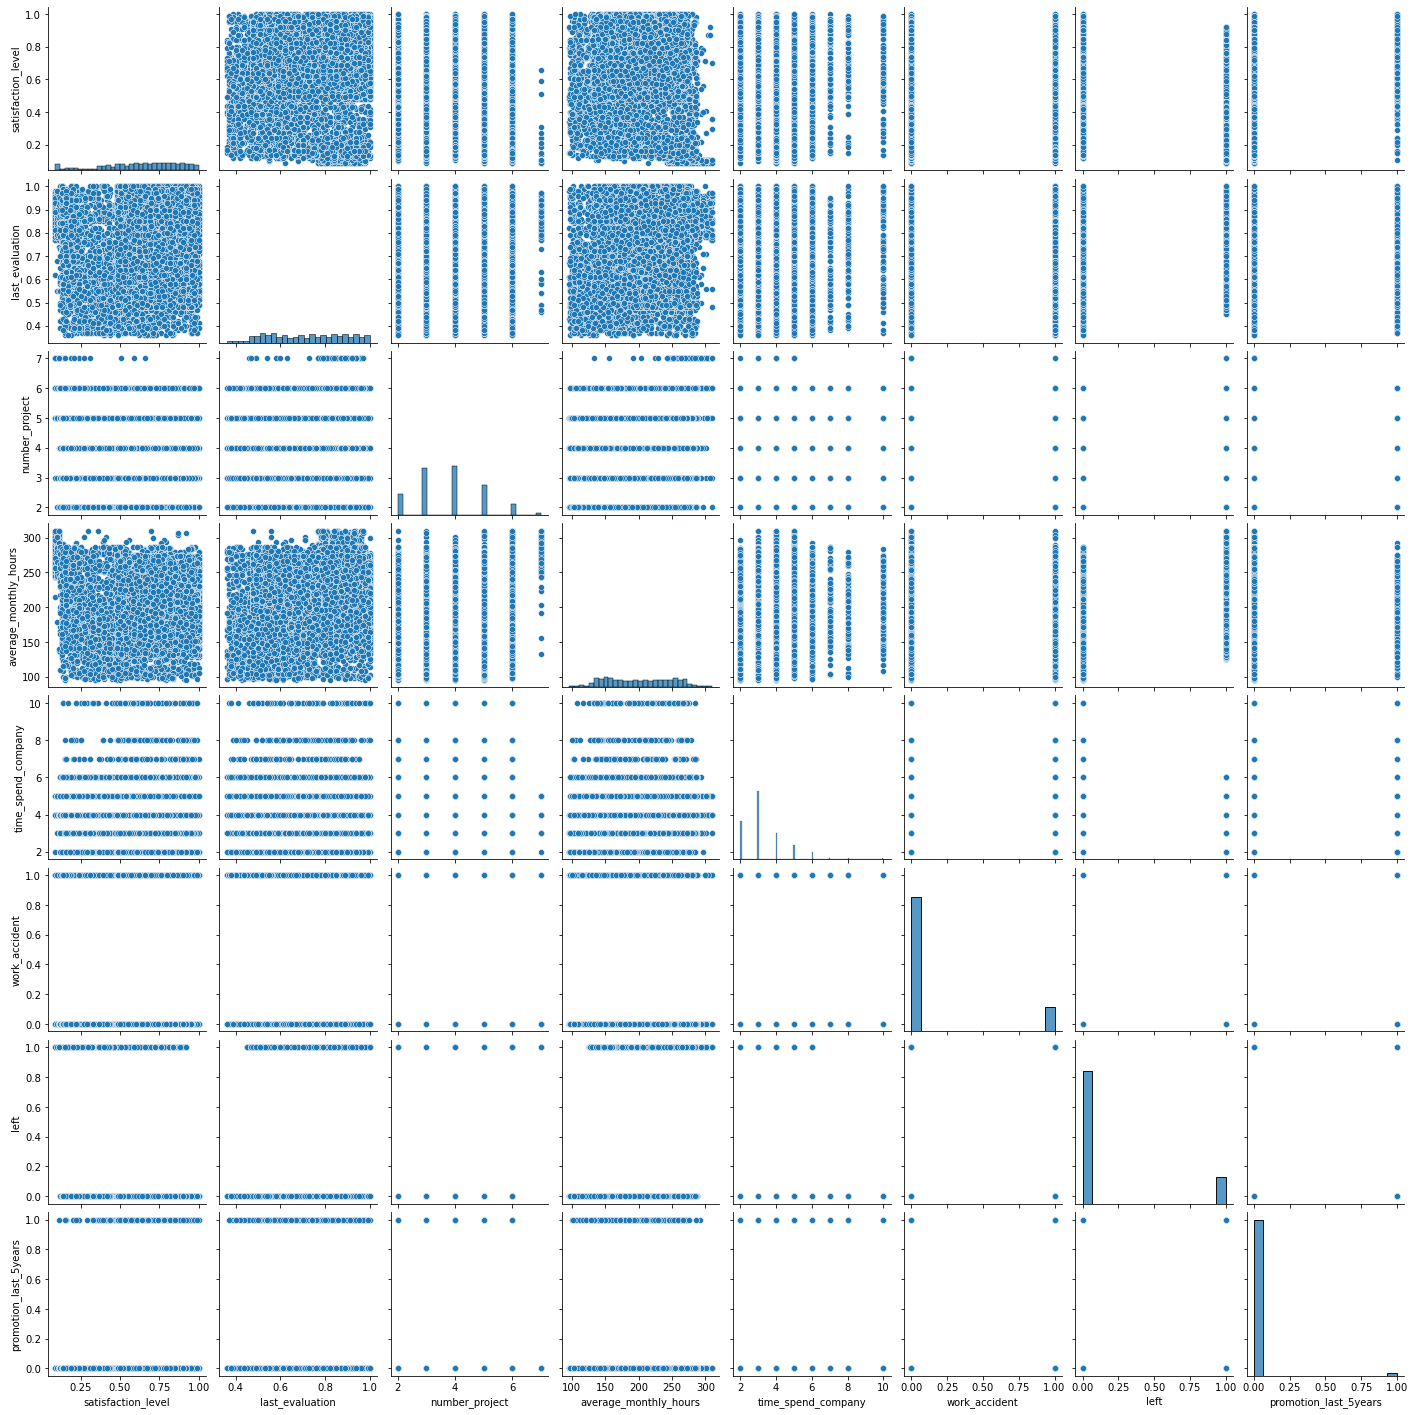

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


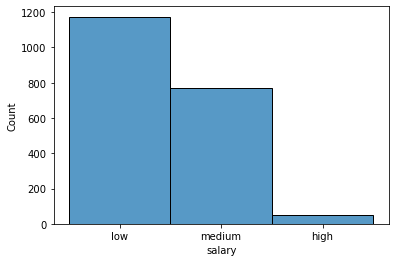

In [49]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.histplot(data = df[df['left']==1],x ='salary')

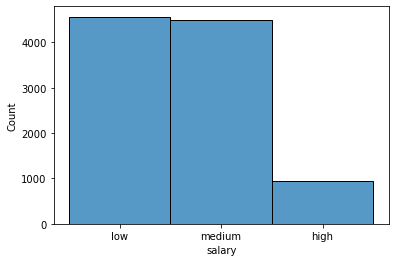

In [50]:
sns.histplot(data = df[df['left']==0],x ='salary')

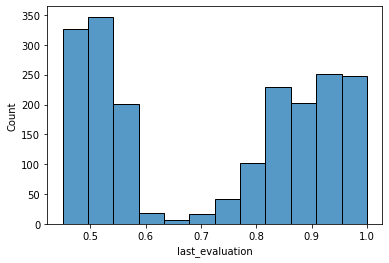

In [47]:
sns.histplot(data = df[df['left']==1],x ='last_evaluation')

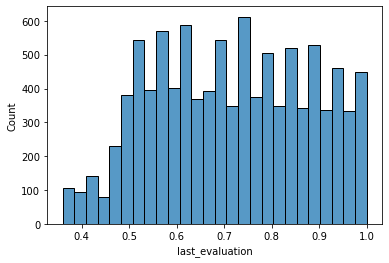

In [48]:
sns.histplot(data = df[df['left']==0],x ='last_evaluation')

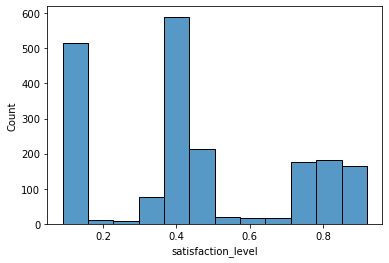

In [51]:
sns.histplot(data = df[df['left']==1],x ='satisfaction_level')

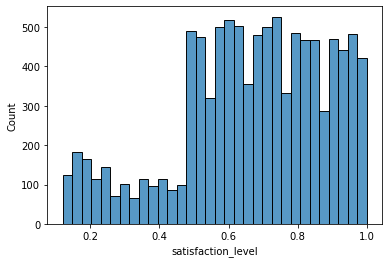

In [52]:
sns.histplot(data = df[df['left']==0],x ='satisfaction_level')

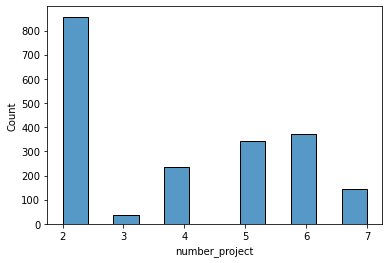

In [38]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data = df[df['left']==1],x ='number_project')

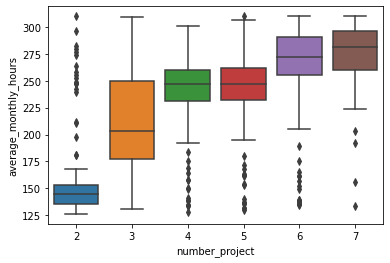

In [83]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data = df[df['left']==1], y = 'average_monthly_hours', x = 'number_project')

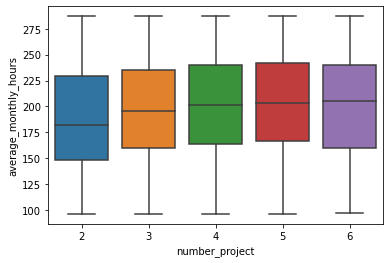

In [84]:
sns.boxplot(data = df[df['left']==0], y = 'average_monthly_hours', x = 'number_project')

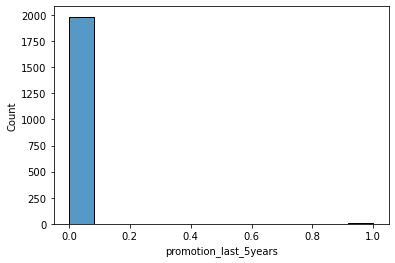

In [67]:
sns.histplot(data = df[df['left']==1], x = 'promotion_last_5years')

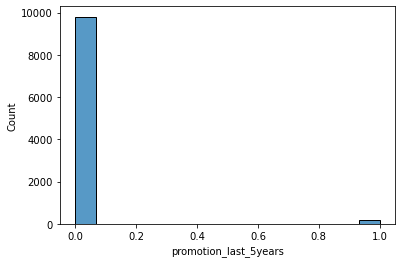

In [56]:
sns.histplot(data = df[df['left']==0], x = 'promotion_last_5years')

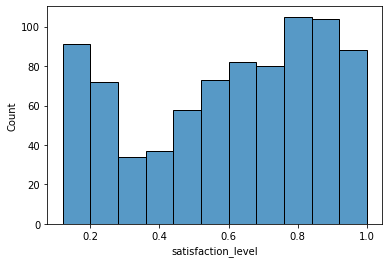

In [46]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data = df[df['time_spend_company']> upper_lim], x = 'satisfaction_level')

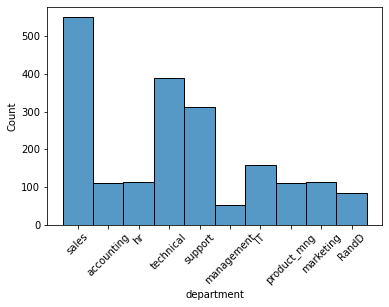

In [61]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data = df[df['left']==1], x = 'department')
plt.xticks(rotation=45)
plt.show()

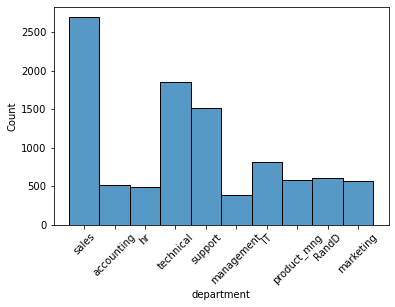

In [62]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data = df[df['left']==0], x = 'department')
plt.xticks(rotation=45)
plt.show()

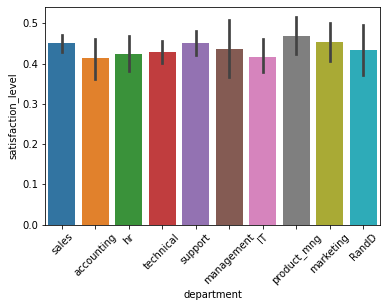

In [68]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data = df[df['left']==1], x = 'department',y = 'satisfaction_level')
plt.xticks(rotation=45)
plt.show()

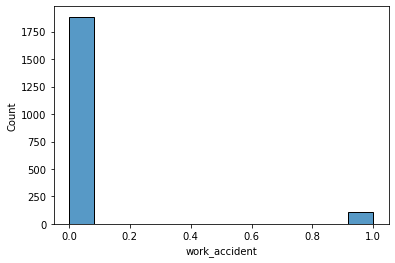

In [71]:
sns.histplot(data = df[df['left']==1], x = 'work_accident')

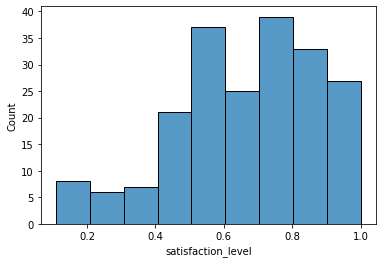

In [73]:
sns.histplot(data = df[df['promotion_last_5years']==1], x = 'satisfaction_level')

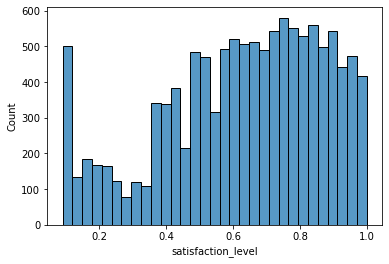

In [76]:
sns.histplot(data = df[df['promotion_last_5years']==0], x = 'satisfaction_level')

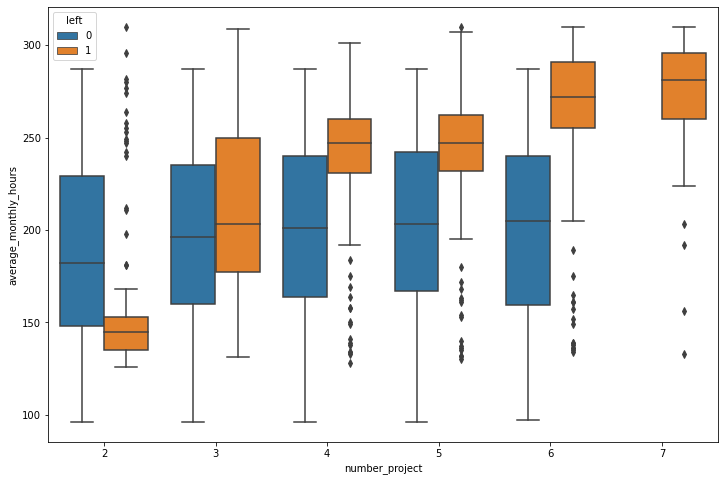

In [85]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'number_project', y = 'average_monthly_hours',hue = 'left')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


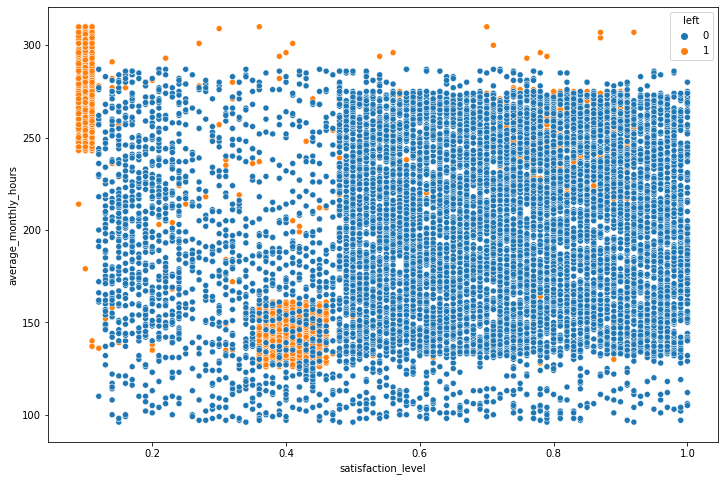

In [92]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = df, x = "satisfaction_level",y = "average_monthly_hours",hue = 'left')

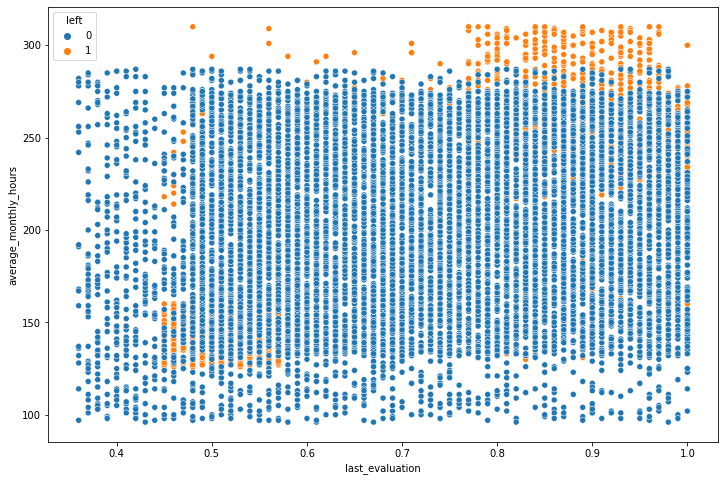

In [94]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = df, x = "last_evaluation",y = "average_monthly_hours",hue = 'left')

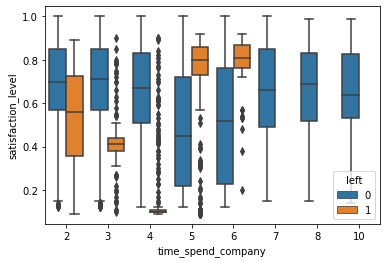

In [99]:
sns.boxplot(data = df,y = 'satisfaction_level', x = 'time_spend_company',hue = 'left')

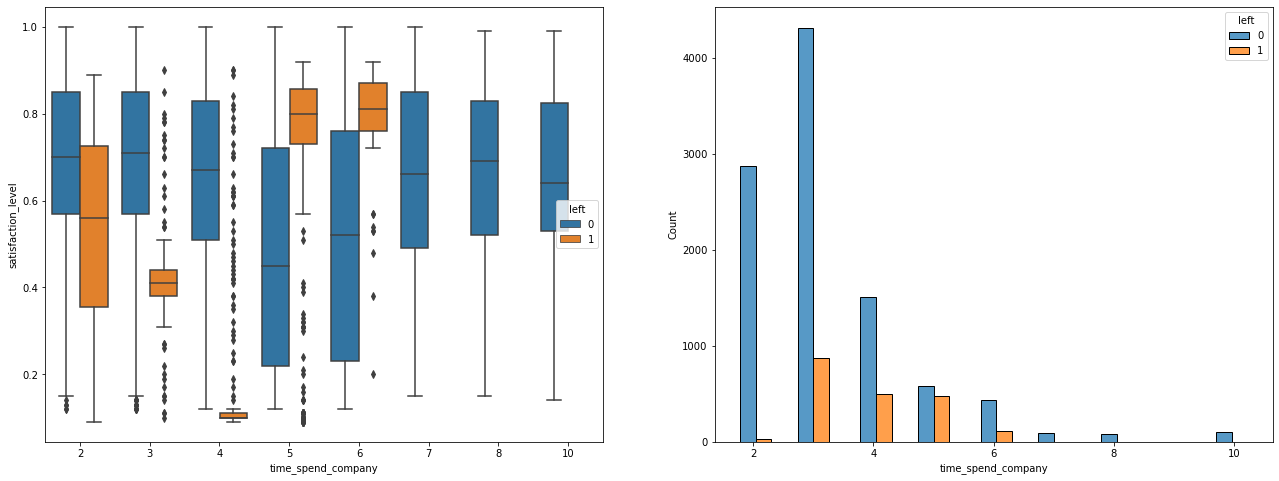

In [106]:
fig, ax = plt.subplots(1,2,figsize = (22,8))
sns.boxplot(data = df,y = 'satisfaction_level', x = 'time_spend_company',hue = 'left',ax = ax[0])
sns.histplot(data = df,x = 'time_spend_company', multiple='dodge', hue = 'left', shrink=6,ax = ax[1])

### Insights

nobody who stayed worked 7 projects, 6 was max. everyone who worked 7 projects left. people who left and worked the same number of projects as people who stayed worked more hours when the number of projects was greater than 2.

people who were with the company 7 years or more did not leave. people who left after 4 years or less had an average satisfaction level less than those who stayed with the same amount of time with the company. oddly, those who left and had 5 or 6 years with the company had a higher avg satisfaction than those who stayed



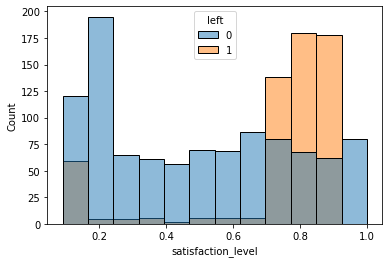

In [109]:
sns.histplot(data = df[(df['time_spend_company'] == 5) | (df['time_spend_company'] == 6)], x = 'satisfaction_level',hue = 'left')

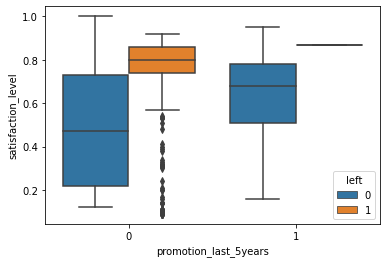

In [114]:
sns.boxplot(data = df[(df['time_spend_company'] == 5) | (df['time_spend_company'] == 6)],y = 'satisfaction_level',x = 'promotion_last_5years',hue = 'left')

In [115]:
'''those who left after 5 or 6 years and did not get a promotion had on average higher satisfaction

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-115-6cde89fda2e1>, line 1)

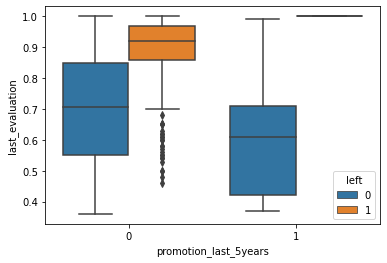

In [117]:
sns.boxplot(data = df[(df['time_spend_company'] == 5) | (df['time_spend_company'] == 6)],y = 'last_evaluation',x = 'promotion_last_5years',hue = 'left')

In [119]:
The employees between 5 and 6 years of tenure and did not get a promotion who left had a higher average satisfaction rate than the those who stayed

SyntaxError: invalid syntax (<ipython-input-119-db6e7a8c06f9>, line 1)

In [124]:
df[(df['time_spend_company'] == 5) | (df['time_spend_company'] == 6)].groupby(['promotion_last_5years','left']).count()

satisfaction_level  last_evaluation  \
promotion_last_5years left                                        
0                     0                    992              992   
                      1                    590              590   
1                     0                     21               21   
                      1                      1                1   

                            number_project  average_monthly_hours  \
promotion_last_5years left                                          
0                     0                992                    992   
                      1                590                    590   
1                     0                 21                     21   
                      1                  1                      1   

                            time_spend_company  work_accident  department  \
promotion_last_5years left                                                  
0                     0                    992            992         992   
                      1                    590            590         590   
1                     0                     21             21          21   
                      1                      1              1           1   

                            salary  
promotion_last_5years left          
0                     0        992  
                      1        590  
1                     0         21  
                      1          1

In [126]:
df[(df['time_spend_company'] == 5) | (df['time_spend_company'] == 6)].shape

(1604, 10)

In [127]:
# out of 1604 people who were there between 5 and 6 years only one got a promotion and left

In [129]:
df[df['left']==1]['satisfaction_level'].mean()

0.4402712204922172

In [131]:
df[df['left']==0]['satisfaction_level'].mean()

0.6673649999999947

In [132]:
df[df['left']==0]['satisfaction_level'].median()

0.69

In [134]:
df[df['left']==1]['satisfaction_level'].median()

0.41

In [137]:
df.groupby('left')['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


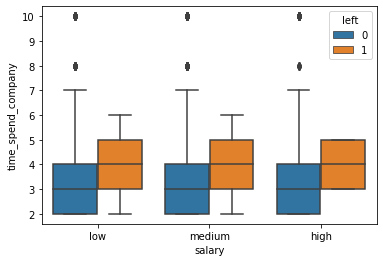

In [141]:
sns.boxplot(data = df, x ='salary',y = 'time_spend_company',hue = 'left')

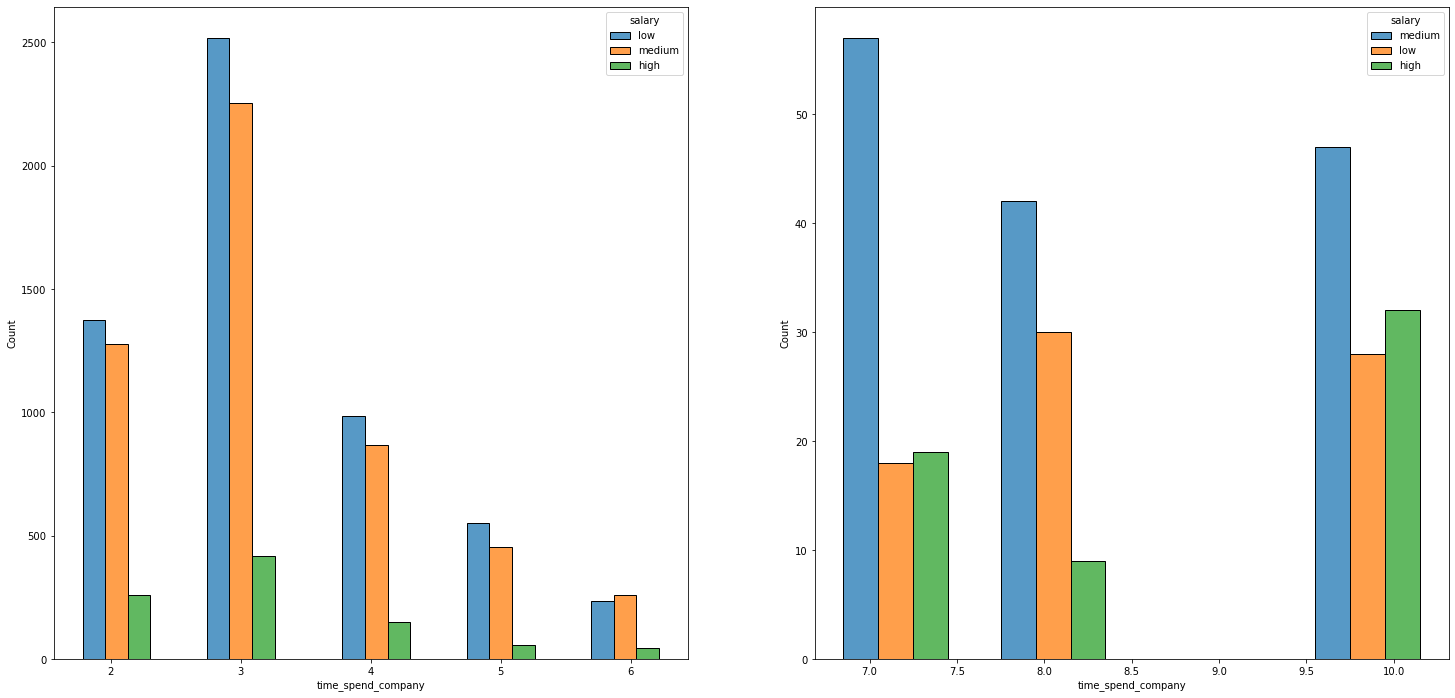

In [157]:
fig,ax = plt.subplots(1,2,figsize = (25,12))
sns.histplot(data = df[df['time_spend_company']<=6], x = 'time_spend_company',hue = 'salary',shrink = 6, multiple = 'dodge',ax =ax[0])
sns.histplot(data = df[df['time_spend_company']>6], x = 'time_spend_company',hue = 'salary',shrink =2, multiple = 'dodge',ax =ax[1])

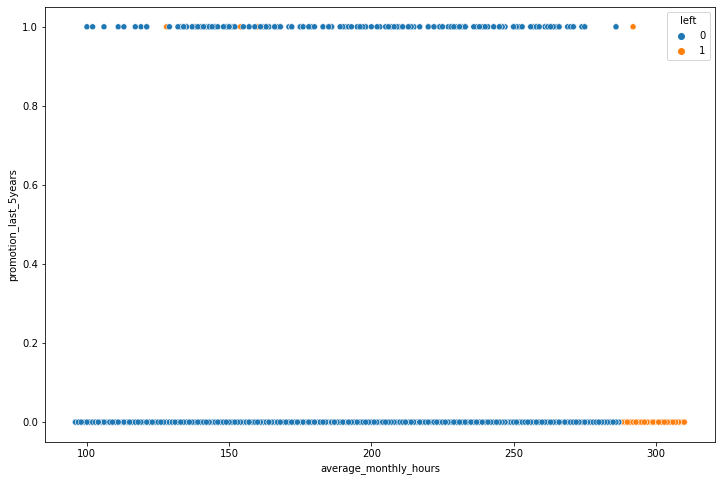

In [168]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x= 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left')

In [170]:
# The most people that left did not get a promotion. 
# Of the people who did not get a promotion,the ones who left worked the most
# Most of the people the worked the greatest number of hours overall did not get a promotion

# It would seem that management is not recognizing hard work enough. Also the ones who are working a ton 
#      might be getting too much on their plate and might not be getting enough assistance

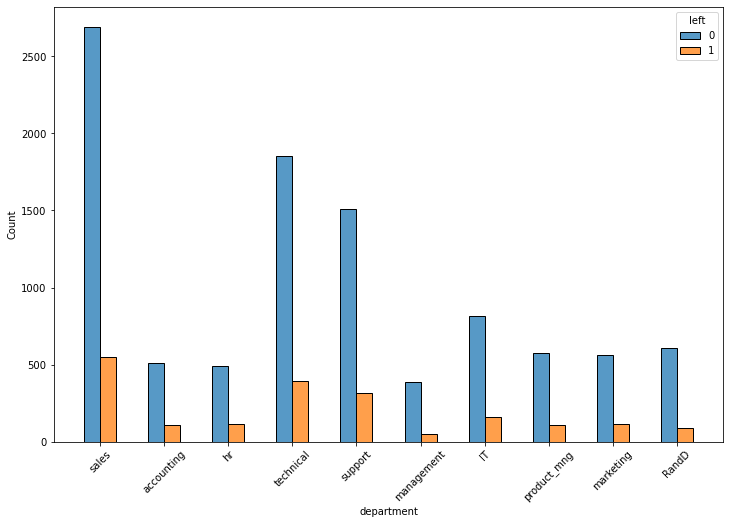

In [178]:
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = 'department',hue = 'left',multiple = 'dodge', shrink = .5)
plt.xticks(rotation=45)
plt.show()

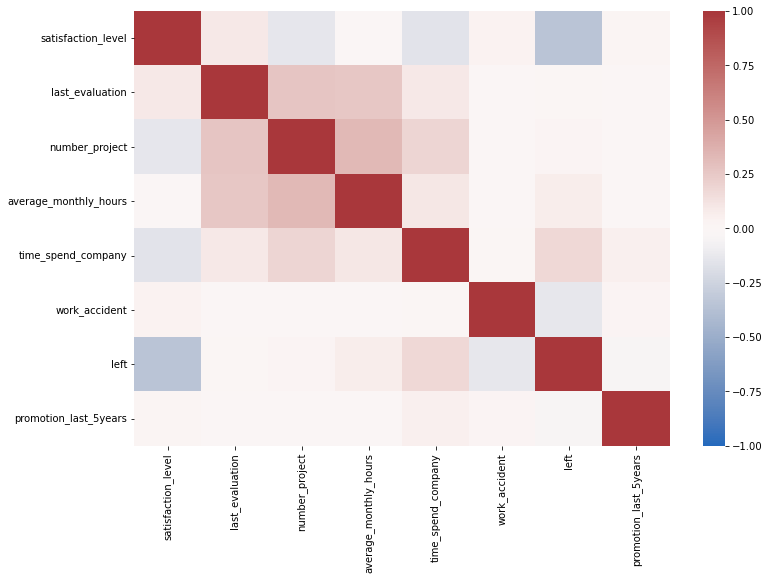

In [187]:
plt.figure(figsize = (12,8))

sns.heatmap(df.corr(),vmin = -1,cmap = sns.color_palette("vlag", as_cmap=True))

In [ ]:
# positive: number of project, evaluation and hours are correlated
# neg: left and satisfaction are correlated

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


It seems that logistic regression and decision trees are the best for this predicion. While there are no extreme outliers, decision trees are still more robost to outliers than logistic regression. I think a decision tree being able to handle multicoliniariy is also a benefit, as there are some variables that seem to be related here. 

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

The dispersion of people who left and who stayed are unusually dispersed among the satisfaction level when broken out by hours worked

- Which independent variables did you choose for the model and why?

I will use all the variables except work accident and department because they dont seem to correlate with anything and are normally disperesed between people that left and staed

- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary Classification

### Identify the types of models most appropriate for this task.

Random forest, boosted model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [190]:
### YOUR CODE HERE ###
df1 = df.drop(['work_accident','department'],axis = 1)
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,1,0,low
1,0.80,0.86,5,262,6,1,0,medium
2,0.11,0.88,7,272,4,1,0,medium
3,0.72,0.87,5,223,5,1,0,low
4,0.37,0.52,2,159,3,1,0,low


In [193]:
df1 = pd.get_dummies(df1,'salary')

In [195]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,1,0


In [196]:
X = df1.drop(['left'],axis = 1)
y = df1['left']

In [215]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = .25,stratify = y)

In [201]:
#X_train,X_val,y_train,y_val = train_test_split(X_tr,y_tr,random_state = 42, test_size = .25,stratify = y_tr)

In [202]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7194, 9)
(2399, 9)
(2398, 9)


In [206]:
cv_params = {'max_depth':[None,3,5],
            'min_samples_leaf':[1,3],
             'min_samples_split':[2,4],
             'max_features':[2,4],
             'n_estimators':[75,150,300]
            }
scoring = {'accuracy','precision','recall','f1'}
rf = RandomForestClassifier(random_state = 42)

In [208]:
rf_cv = GridSearchCV(rf,cv_params,scoring = scoring,cv = 5, refit = 'recall')

In [216]:
#rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [217]:
#pickle.dump(rf_cv, open('rf_cv.sav', 'wb'))

In [211]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
  ### YOUR CODE HERE ###
    met_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'accuracy': 'mean_test_accuracy',
                   'f1': 'mean_test_accuracy'}
  # Get all the results from the CV and put them in a df
  ### YOUR CODE HERE ###
    cv_results = pd.DataFrame(model_object.cv_results_)
  # Isolate the row of the df with the max(metric) score
  ### YOUR CODE HERE ###
    best_estimator_results = cv_results.iloc[cv_results[met_dict[metric]].idxmax(), :]
  # Extract Accuracy, precision, recall, and f1 score from that row
    accuracy = best_estimator_results['mean_test_accuracy']
    precision = best_estimator_results['mean_test_precision']
    recall= best_estimator_results['mean_test_recall']
    f1 = best_estimator_results['mean_test_f1']
    
  ### YOUR CODE HERE ###
  # Create table of results
    table = pd.DataFrame({'model':[model_name],
                          'accuracy':[accuracy],
                          'precision':[precision],
                          'recall': [recall],
                          'f1':[f1]
                         },)
  ### YOUR CODE HERE ###
    return table

In [218]:
table =make_results('random_forest',rf_cv,'recall')
table

,model,accuracy,precision,recall,f1
0,random_forest,0.984098,0.987751,0.915596,0.950258


In [221]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [222]:
y_pred_rf = rf_cv.predict(X_test)

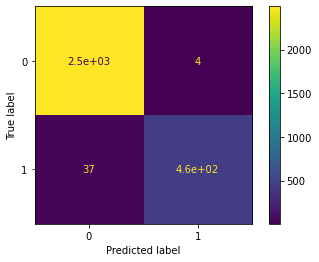

In [224]:
cm = confusion_matrix(y_test,y_pred_rf,labels = rf_cv.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = rf_cv.classes_)
disp.plot()
plt.show()

In [248]:
# Now for XG Boost

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = .25,stratify = y)



In [256]:
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 42)

cv_params = {'max_depth':[None,3,5,8],
             'n_estimators':[75,150,300],
             'min_child_weight': [1,3,5],
             'learning_rate':[0.1,0.01,0.3]
            }
scoring = {'accuracy','precision','recall','f1'}

xgb_cv = GridSearchCV(xgb, cv_params,scoring = scoring, refit = 'recall')

In [257]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 13min 45s, sys: 6.47 s, total: 13min 52s
Wall time: 6min 58s


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.

In [258]:
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

In [260]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300}

In [261]:
y_pred_xgb = xgb_cv.predict(X_test)

In [262]:
xgb_cv.best_score_

0.924975870350834

In [263]:
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
table = pd.concat([table,xgb_cv_results],axis = 0)
table

,model,accuracy,precision,recall,f1
0,random_forest,0.984098,0.987751,0.915596,0.950258
0,XGB cv,0.171913,0.167025,1.000000,0.286236
0,XGB cv,0.171913,0.167025,1.000000,0.286236
0,XGB cv,0.982431,0.967826,0.924976,0.945893


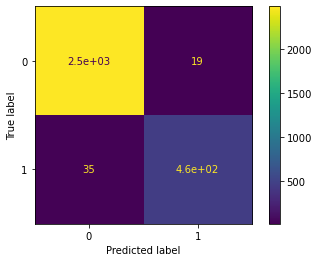

In [264]:
cm_xgb = confusion_matrix(y_val,y_pred_xgb,labels = xgb_cv.classes_)
disp_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels = xgb_cv.classes_)
disp_xgb.plot()
plt.show()

In [244]:
from sklearn.tree import plot_tree




In [245]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

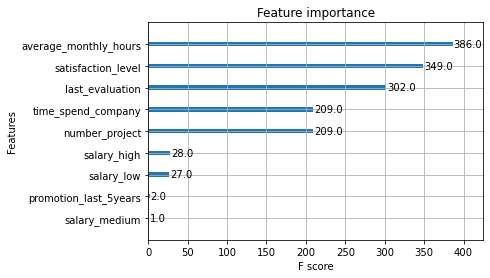

In [265]:
plot_importance(xgb_cv.best_estimator_);

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders


It is clear that employees who are overworked are more likely to leave. 
Recommendations:
1) Give employees a cut off for how many hours they are allowed to work OR make sure they are well compensated for overtime
2) Make sure that if they are working on too many projects (4 or more) that they are given the support staff or help they need.
3) Make sure they are not feeling alone or swamped.
4) For employees who were with the company a long time(5 or more years), consider a pay increase, title upgrade, bonus, or other benefit. If management thinks the employee performance indicates that they should not get one of these benefits, meet with the management and the employee to come up with a decision on continuing employement, goals, and performance objectives



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.